<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/Examens/Examen_MN1_Repesca_2019_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Mètodes Numèrics I (5 julio 2019) - REPESCA Programación

**Nombre:**

**NIU:**

**mail (para hacer llegar el Notebook corregido):**

In [10]:
# Ejecuta esta parte de código para importar las librerías necesarias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Ejercicio 1 [4 puntos]

A partir de una distribución normal ($\mu = 0$, \$\sigma = 1$), realiza las siguientes gráficas:

1. **[1 punto]** Haz una gráfica de la distribución normal (pdf) en el rango $[-5\sigma, 5\sigma]$ e indica con unas líneas verticales el área correspondiente a un intervalo de confianza del 95% centrado en la media. Sombrea el intervalo de confianza en el gráfico. 
2. **[1.5 puntos]** En el mismo rango que en la sección anterior, mueve los límites, preservando el intervalo de confianza del 95%, pero que por encima del límite superior te quede un área del 1%. Sombrea el intervalo de confianza en el gráfico. Se han movido la misma distancia el límite inferior y superior en comparación a la sección 1? Razona.
3. **[1.5 puntos]** Partiendo de la sección 1, mueve el límite superior en 1000 pasos equidistantes hasta $5\sigma$ y calcula como cambia el límite inferior que mantiene un intervalo de confianza del 95%. Haz una gráfica de la evolución del límite inferior para cada uno de los pasos considerados para el límite superior. Ves que el límite inferior converge hacia un valor concreto? Razona. 

Ejercicio 1 - Apartado 1


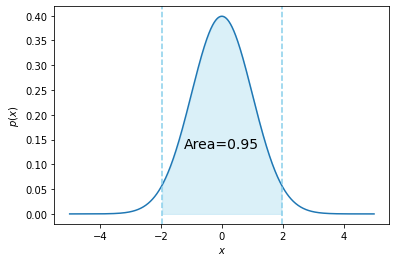

In [11]:
# Ejercicio 1 - Apartado 1
print("Ejercicio 1 - Apartado 1")

x = np.linspace(-5,5, 1000)
G = ss.norm.ppf(0.975)
y = ss.norm.pdf(x)

plt.plot(x,y)  
plt.text(0,np.max(y) / 3, 'Area=0.95', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(G, linestyle='--', color='skyblue')
plt.axvline(-G, linestyle='--', color='skyblue')
xf = np.linspace(-G,G, 1000)
yf = ss.norm.pdf(xf)
plt.fill_between( xf, yf, color="skyblue", alpha=0.3)
plt.ylabel(r'$p(x)$')
plt.xlabel(r'$x$')
plt.show()

Ejercicio 1 - Apartado 2


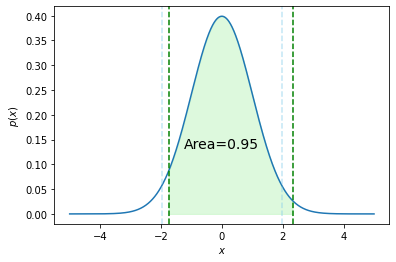

dx_inf 0.20927791328788414
dx_sup 0.3663838895007867


In [12]:
# Ejercicio 1 - Apartado 2
print("Ejercicio 1 - Apartado 2")

G1 = ss.norm.ppf(0.04)
G2 = ss.norm.ppf(0.99)

plt.plot(x,y)  
plt.text(0,np.max(y) / 3, 'Area=0.95', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(G, linestyle='--', color='skyblue', alpha=0.5)
plt.axvline(-G, linestyle='--', color='skyblue', alpha=0.5)
plt.axvline(G1, linestyle='--', color='green')
plt.axvline(G2, linestyle='--', color='green')
xf2 = np.linspace(G1,G2, 1000)
yf2 = ss.norm.pdf(xf2)
plt.fill_between( xf2, yf2, color="lightgreen", alpha=0.3)
plt.ylabel(r'$p(x)$')
plt.xlabel(r'$x$')
plt.show()

print("dx_inf {}".format(G1-(-G)))
print("dx_sup {}".format(G2-(G)))

Ejercicio 1 - Apartado 3


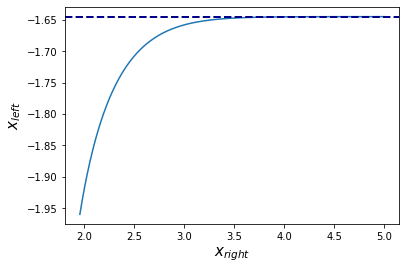

El valor converge a ppf(0.05) = -1.6448536269514729


In [13]:
# Ejercicio 1 - Apartado 3
print("Ejercicio 1 - Apartado 3")

yup = ss.norm.ppf(0.975)
xscan = np.linspace(yup,5, 1000)

yprob = ss.norm.cdf(xscan)
ylow = ss.norm.ppf(yprob-0.95)

plt.plot(xscan,ylow)
plt.xlabel(r'$x_{right}$', fontsize = 15)
plt.ylabel(r'$x_{left}$', fontsize = 15)
plt.axhline(ss.norm.ppf(0.05), linestyle='--', color='darkblue', lw=2)

plt.show() 

print("El valor converge a ppf(0.05) = {}".format(ss.norm.ppf(0.05)))

# Ejercicio 2 [6 puntos]

Considera esta muestra de 50 puntos, que sigue una distribución Gaussiana:

{22.3,12.9,-10.1,-36.9,-38.5,-23.4,-4.3,5.5,48.8,20.5,18.1,8.3,-37.2,-8.1,-5.6,41.4,-6.5,-16.7,-12.8,-30.0,11.9,-12.6,6.6,-24.8,6.0,34.5,-31.2,63.3,-19.8,22.1,-42.5,18.9,-0.0,-13.1,-37.4,-68.1,20.7,59.1,-37.0,-31.9,-92.2,-29.9,11.9,6.5,13.8,2.6,-33.9,27.3,17.8,-18.6}

1. **[0.5 puntos]** Calcula el valor medio ($\mu_m$) y la sigma ($\sigma_m$) de la muestra.
2. **[2 puntos]** Vamos a calcular ahora el estimador $\hat{\sigma}$ que maximiza la función de verosimilitud $L$. Fija el valor medio de la distribución Gaussiana en $\mu_m$ y considera 1000 pasos equidistantes entre $\sigma_{inf}$=15 y $\sigma_{sup}$=45. Implementa la función que te calcula $l = ln(L)$ (log-likelihood), para cada valor de $\sigma$. Haz una gráfica de los valores $l$ en el rango [$\sigma_{inf}$,$\sigma_{sup}$] y evalúa cual es el $\sigma_{óptimo}$ (el que maximiza la función $l$). Recuerda, que para cada $\sigma_i$ en el rango se calcula $l_i$ como:

$$
l_i = ln(L_i) = \sum_{n=1}^{50} ln f(x_n, \mu_m, \sigma_i)
$$

3. **[2 puntos]** Vamos a calcular ahora la $\sigma_{óptima}$ usando la función cumulativa de tu muestra y comparando con las diferentes funciones cumulativas de test que has obtenido en la sección 2. En este caso, para cada valor $x_i$ de tu muestra, la función cumulativa te incrementa en un factor 1/50, y queda fijada. En el test (simple) de Kolmogorov-Smirnov, para cada punto de tu muestra puedes calcular la diferencia de la función cumulativa de tu muestra con el valor cumulativo que obtienes con la función de test en ése mismo punto, y quedarte con el valor de desviación máxima. La función de test que mejor se ajusta es aquella que está 'más' cerca de tu función cumulativa de muestra de acuerdo con esta distancia $d_{max}$. Para todas tus variaciones, el $\sigma_{óptimo}$ será aquel que minimiza este valor de $d_{max}$. Haz una gráfica de los valores $d_{max}$ en el rango [$\sigma_{inf}$,$\sigma_{sup}$] y evalúa cual es el $\sigma_{óptimo}$ (el que minimiza la función $d_{max}$). El valor $d_{max,i}$ se calcula para cada función de test $i$ como:

$$
d_{max,i} = max_{n=1}^{50}( | CDF_{muestra}(x_n) - CDF_{Gaussiana}(x_n, \mu_m, \sigma_i) | )
$$

4. **[1.5 puntos]** Haz una grafica de la función cumulativa de la muestra, y la función cumulativa de la gaussiana que mejor se ajusta, según los valores de $\sigma$ obtenidos en el apartado 1, 2 y 3. Muestra también la función cumulativa de una distribución uniforme en el rango donde está tu muestra y compara el resultado con tus ajustes. 


In [14]:
# AYUDA PROBLEMA 2 - Definición de variables

a = [22.3,12.9,-10.1,-36.9,-38.5,-23.4,-4.3,5.5,48.8,20.5,18.1,8.3,-37.2,-8.1,-5.6,
     41.4,-6.5,-16.7,-12.8,-30.0,11.9,-12.6,6.6,-24.8,6.0,34.5,-31.2,63.3,-19.8,22.1,
     -42.5,18.9,-0.0,-13.1,-37.4,-68.1,20.7,59.1,-37.0,-31.9,-92.2,-29.9,11.9,6.5,
     13.8,2.6,-33.9,27.3,17.8,-18.6]

minsigma = 15
maxsigma = 45

In [15]:
# Ejercicio 2 - Apartado 1
print("Ejercicio 2 - Apartado 1")

print("\nMean = {}".format(np.mean(a)))
print("Sigma = {}".format(np.std(a)))

Ejercicio 2 - Apartado 1

Mean = -4.446
Sigma = 30.349307801002645


Ejercicio 2 - Apartado 2


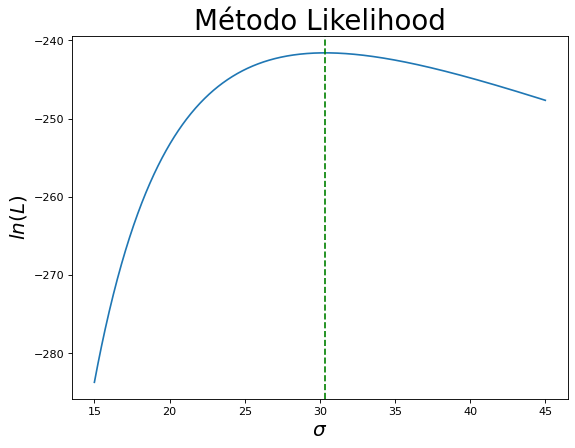


 Sigma_óptimo = 30.345345345345343 



In [16]:
# Ejercicio 2 - Apartado 2
print("Ejercicio 2 - Apartado 2")

L = []
sigstep = np.linspace(minsigma,maxsigma,1000)

for i in range(len(sigstep)):
  L.append(np.cumsum(np.log(ss.norm.pdf(a,np.mean(a),scale=sigstep[i])))[-1])

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sigstep,L)
plt.title('Método Likelihood', fontsize=25)
plt.xlabel('$\sigma$', fontsize=18)
plt.ylabel('$ln(L)$', fontsize=18)
plt.axvline(sigstep[L.index(np.max(L))], linestyle='--', color='green')
plt.show()

#print(L)

print("\n Sigma_óptimo = {} \n".format(sigstep[L.index(np.max(L))]))

Ejercicio 2 - Apartado 3


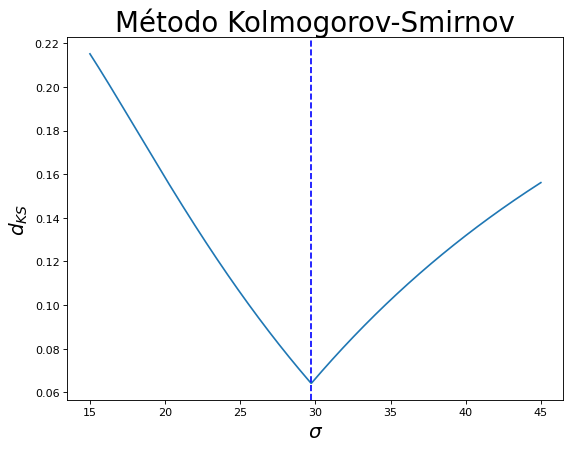


 Sigma_óptimo KS = 29.714714714714717 



In [17]:
# Ejercicio 2 - Apartado 3
print("Ejercicio 2 - Apartado 3")

KS = []
#KSm = []
#KSpdf = []
#KSpdf2 = []
b = np.sort(a)

sigstep = np.linspace(minsigma,maxsigma,1000)
n=np.linspace(1/len(b),1,len(b))

for i in range(len(sigstep)):
  KS.append(np.max(np.abs(n-ss.norm.cdf(b,loc=np.mean(a),scale=sigstep[i]))))
#  KSpdf2.append(np.max(np.abs(n-ss.norm.cdf(b,loc=np.mean(a),scale=sigstep[i]))*ss.norm.pdf(n)))  # Otro método que minimiza el cum. de la dist. No lo pido.
#  KSm.append(np.cumsum(np.abs(n-ss.norm.cdf(b,loc=np.mean(a),scale=sigstep[i])))[-1]) # Otro método que minimiza el cum. de la dist. No lo pido.
#  KSpdf.append(np.cumsum(np.abs(n-ss.norm.cdf(b,loc=np.mean(a),scale=sigstep[i]))*ss.norm.pdf(n))[-1]) # Otro método que minimiza el cum. de la dist. No lo pido.

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sigstep,KS)
#plt.plot(sigstep,KSm)
#plt.plot(sigstep,KSpdf)
#plt.plot(sigstep,KSpdf2)
plt.title('Método Kolmogorov-Smirnov', fontsize=25)
plt.xlabel('$\sigma$', fontsize=18)
plt.ylabel('$d_{KS}$', fontsize=18)
plt.axvline(sigstep[KS.index(np.min(KS))], linestyle='--', color='blue')
#plt.axvline(sigstep[KSm.index(np.min(KSm))], linestyle='--', color='orange')
#plt.axvline(sigstep[KSpdf.index(np.min(KSpdf))], linestyle='--', color='green')
#plt.axvline(sigstep[KSpdf.index(np.min(KSpdf))], linestyle='--', color='red')
#plt.yscale('log')
plt.show()

print("\n Sigma_óptimo KS = {} \n".format(sigstep[KS.index(np.min(KS))]))
#print("\n Sigma_óptimo KS pesado = {} \n".format(sigstep[KSpdf2.index(np.min(KSpdf2))]))
#print("\n Sigma_óptimo SumaD = {} \n".format(sigstep[KSm.index(np.min(KSm))]))
#print("\n Sigma_óptimo SumaD pesada = {} \n".format(sigstep[KSpdf.index(np.min(KSpdf))]))





Ejercicio 2 - Apartado 4


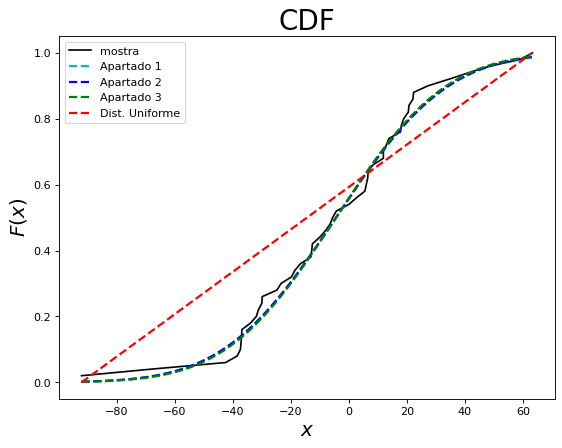

In [18]:
# Ejercicio 2 - Apartado 4
print("Ejercicio 2 - Apartado 4")

x = np.linspace(np.min(b),np.max(b),1000)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(b,n,'-',color='k', label='mostra')
plt.plot(x,ss.norm.cdf(x,loc=np.mean(a),scale=np.std(a)),'c--',lw=2, label='Apartado 1')
plt.plot(x,ss.norm.cdf(x,loc=np.mean(a),scale=sigstep[L.index(np.max(L))]),'b--',lw=2, label='Apartado 2')
plt.plot(x,ss.norm.cdf(x,loc=np.mean(a),scale=sigstep[KS.index(np.min(KS))]),'g--', lw=2, label='Apartado 3')
plt.plot(x,ss.uniform.cdf(x, loc=np.min(b), scale=np.max(b)-np.min(b)),'r--',lw=2, label='Dist. Uniforme')
plt.legend()
plt.title('CDF', fontsize=25)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$F(x)$', fontsize=18)
plt.show()

**Atenció** Recordeu que un cop entregat heu d'apuntar l'hora de sortida al portàtil del Flix o el Sergio.

**Atenció 2** Abans d'entregar, podeu assegurar-vos de que el vostre codi s'executa correctament fent: Entorno de ejecución >> Reiniciar entorno de ejecución , i després fent Entorno de ejecución >> Ejecutar todas